<a href="https://colab.research.google.com/github/AlterCJ/denteeth/blob/main/Denteeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip denteeth.zip

Archive:  denteeth.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of denteeth.zip or
        denteeth.zip.zip, and cannot find denteeth.zip.ZIP, period.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height, img_width = 150, 150
batch_size = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    "train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 40 files belonging to 2 classes.
Found 40 files belonging to 2 classes.
Found 103 files belonging to 2 classes.


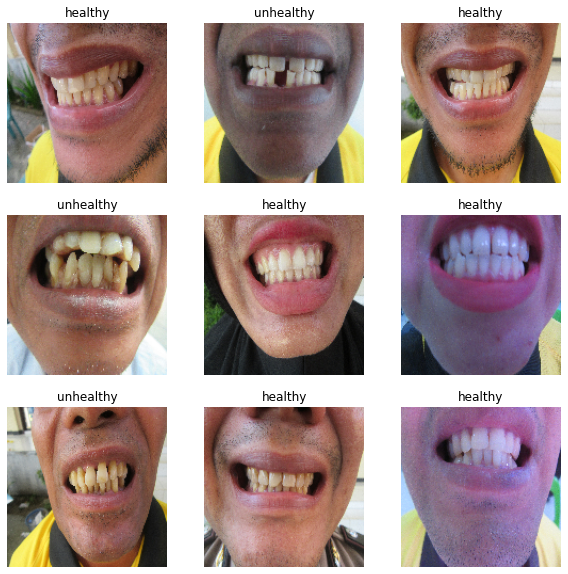

In [ ]:
class_names = ["healthy", "unhealthy"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1.0/255.),
     tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    verbose=1,
    epochs = 10
)

Epoch 1/10


KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 13s 231ms/step - loss: 0.6888 - accuracy: 0.5146


[0.6887654662132263, 0.5145630836486816]

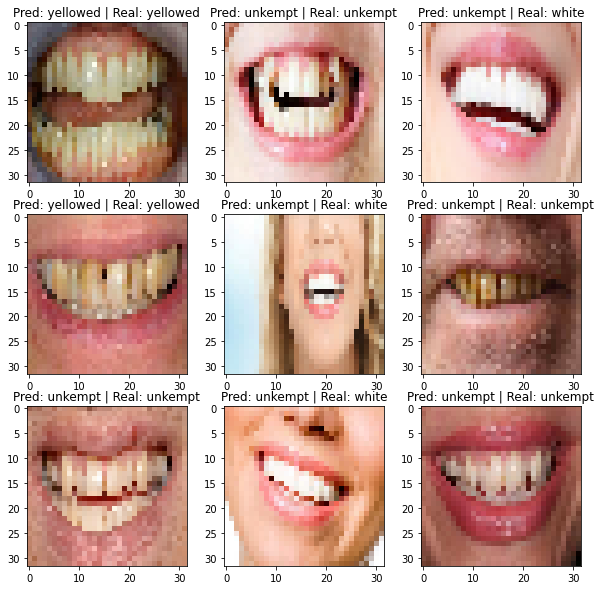

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp3301arh6/assets
